In [1]:
# IMPORT PANDAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# READ THE CSV FILE
df = pd.read_csv("WHO-COVID-19-global-data.csv") # READ THE DATASET
df = pd.DataFrame(df)

In [2]:
# WORKING ON UAE
df_countries = df.groupby(df["Country"])

#UAE
df_uae = df_countries.get_group("United Arab Emirates")
df_uae = df_uae.reset_index(drop = True)
df_uae = df_uae['Cumulative_cases']
df_uae = pd.DataFrame(df_uae)

In [3]:
#NORMALIZATION

pop_u = 9890000

df_uae["Cumulative_cases_norm"] = df_uae["Cumulative_cases"]/pop_u

In [4]:
unarem = df_uae

In [5]:
i = 0
while i < 90:
    unarem = unarem.drop(unarem.index[0])
    i = i + 1

unarem = unarem.reset_index(drop = True)

In [6]:
unarem["Cumulative_cases_norm"] = unarem["Cumulative_cases"]/pop_u

unarem["log"] = np.log(unarem["Cumulative_cases_norm"])

# UAE

**log P = c + rt -------------------1**

The exponential of the First wave of UAE is 0-80 (in days).

Now from the graphs in the previous codes, we know that

c = -9.40507

t = 80

log(P) = -5.40304 (from the log return graph at t = 80)

From 1,

-5.40304 = -9.40507 + 80.r

r = (-5.40304 + 9.40507)/80

r = 0.05002

In [7]:
r = 0.05002
from scipy.integrate import odeint

# Total population, n
n = pop_u
# Initial number of infected and recovered individuals, i_0 and r_0
i_0 = unarem["Cumulative_cases_norm"][0]
r_0 = 0

# beginning of the period s_0
s_0 = 1 - i_0 - r_0

In [8]:
# Assuming that people tend to recover within 10 days
b = 0.1
a = r + b

In [9]:
t = np.linspace(0, 80, 80)
# The SIR model differential equations.
def deriv(y, t, a, b):
    S, I, R = y
    dSdt = - a * S * I
    dIdt = a * (S * I) - (b * I)
    dRdt = b * I
    return dSdt, dIdt, dRdt

y0 = s_0, i_0, r_0
ret = odeint(deriv, y0, t, args=(a, b))
S, I, R = ret.T

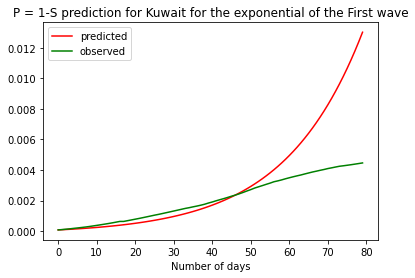

In [10]:
s = pd.DataFrame()
s["s"] = S
s["pred"] = 1 - s["s"]
s["pred"].plot(c = 'red', label = 'predicted')
unarem['Cumulative_cases_norm'][:80].plot(c = 'green', label = 'observed')
plt.title("P = 1-S prediction for Kuwait for the exponential of the First wave")
plt.xlabel("Number of days")
plt.legend()
plt.show()